In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import os
import IPython.display as ipd
from scipy.fft import fft, fftfreq, rfft, rfftfreq, ifft, irfft
from scipy.io import wavfile

# https://realpython.com/python-scipy-fft/#practical-example-remove-unwanted-noise-from-audio

In [2]:
x, sr = librosa.load(os.path.join('files', 'Task_3', 'C.Noisy_Voice.wav'))
x.shape, sr

((192560,), 22050)

In [3]:
ipd.Audio(data=x, rate=sr)

In [4]:
def play(x):
    sf.write('task3.wav', x, sr)
    return ipd.Audio('task3.wav')

(<Figure size 1008x360 with 1 Axes>,
 <librosa.display.AdaptiveWaveplot at 0x17a1d4fc370>)

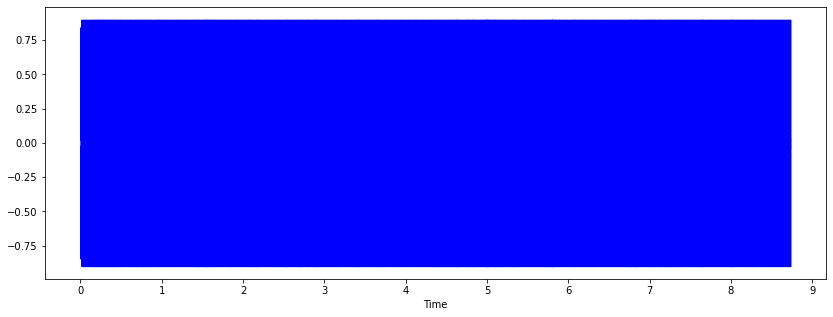

In [5]:
plt.figure(figsize=(14, 5)), librosa.display.waveshow(x, sr=sr, color='blue')

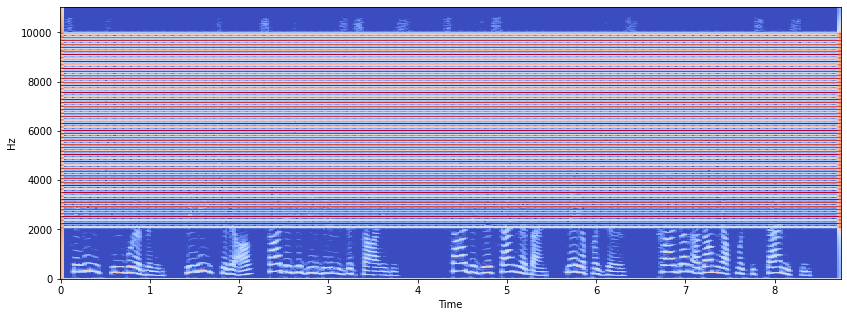

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [7]:
def filter_sound(min_freq, max_freq, viz=False):
    normalized_tone = np.int16((x/x.max()) * 32767)
    if viz: plt.plot(normalized_tone[:1000]), plt.show()

    yf = rfft(normalized_tone)
    xf = rfftfreq(x.shape[0], 1/sr)
    if viz: plt.plot(xf, np.abs(yf)), plt.show()

    yf[(np.abs(xf)<min_freq)] = 0
    yf[(np.abs(xf)>max_freq)] = 0
    if viz: plt.plot(xf, np.abs(yf)), plt.show()

    new = irfft(yf)
    if viz: plt.plot(new), plt.show()

    norm_new = np.array(new * (32767 / new.max()))

    if viz:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(norm_new, sr=sr, color='blue')
        plt.show()
        plt.figure(figsize=(14, 5))
        X = librosa.stft(norm_new)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
        plt.show()

    return play(np.int16(norm_new))

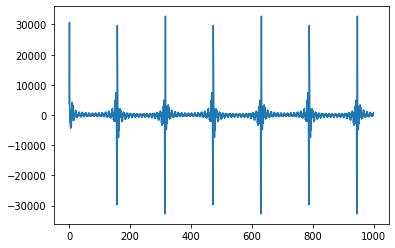

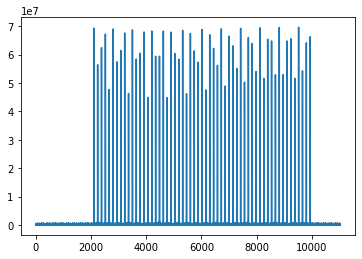

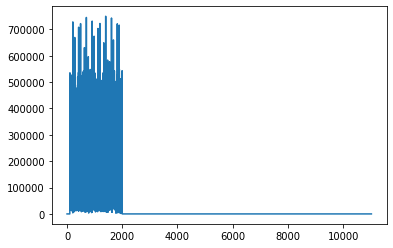

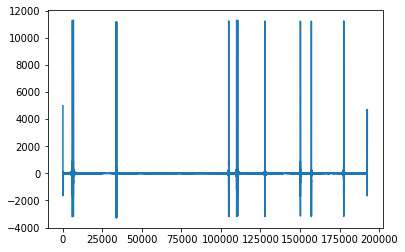

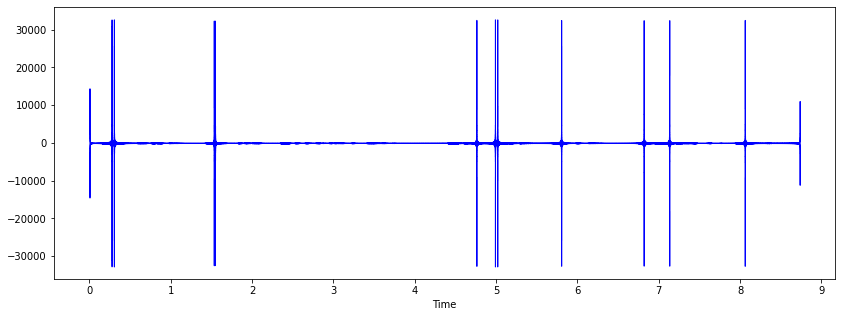

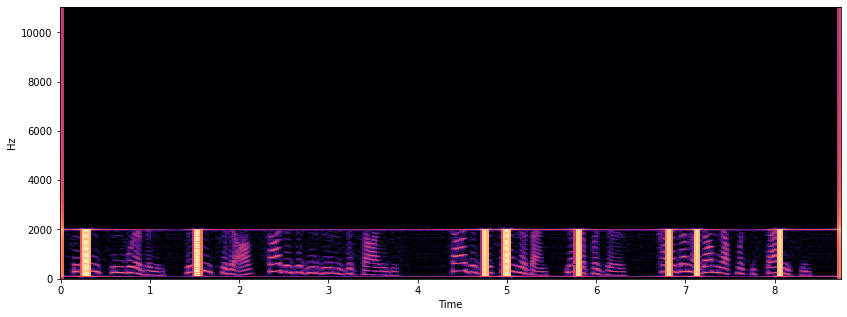

In [8]:
filter_sound(100, 2000, True)

In [13]:
from pydub import AudioSegment
song = AudioSegment.from_wav('task3.wav')
song + 50 # add 50 decibels and play Google Translate just in case?

In [15]:
!whisper task3.wav --model large-v2 --language Turkish --task translate

[00:00.000 --> 00:04.000]  I'm here for you, take me in, we only have each other.


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\whisper\transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


[00:04.000 --> 00:07.000]  Just you and me, what will we do?
[00:07.000 --> 00:09.000]  Would you like to be a snowman?
